In [ ]:
#Import Libraries

In [1]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
# Import the Files

In [3]:
train = pd.read_csv("C:/Users/Hp/Documents/Wallmart Project/train.csv.zip")
test = pd.read_csv("C:/Users/Hp/Documents/Wallmart Project/test.csv.zip")
features = pd.read_csv("C:/Users/Hp/Documents/Wallmart Project/features.csv.zip")
sampleSubmission= pd.read_csv("C:/Users/Hp/Documents/Wallmart Project/sampleSubmission.csv.zip")
stores = pd.read_csv("C:/Users/Hp/Documents/Wallmart Project/stores.csv")

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
# Check the data types

In [9]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [10]:
test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [11]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [12]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [13]:
sampleSubmission.dtypes

Id              object
Weekly_Sales     int64
dtype: object

In [ ]:
# Change the Data Types of Date to Datetime

In [14]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)
features.Date = pd.to_datetime(features.Date)

In [ ]:
#Converting a Catagorical to Numerical Values

In [15]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating a instance of label Encoder

In [16]:
le = LabelEncoder()

In [ ]:
# Using .fit_transform function to fit label
# encoder and return encoded label

In [17]:
label = le.fit_transform(stores['Type'])

In [18]:
label

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       1])

In [ ]:
# removing the column 'Purchased' from df
# as it is of no use now

In [19]:
stores.drop("Type", axis=1, inplace=True)

In [ ]:
# Appending the array to our dataFrame
# with column name 'Purchased

In [20]:
stores["Type"] = label

In [21]:
stores

,Store,Size,Type
0,1,151315,0
1,2,202307,0
2,3,37392,1
3,4,205863,0
4,5,34875,1
5,6,202505,0
6,7,70713,1
7,8,155078,0
8,9,125833,1
9,10,126512,1


In [ ]:
# Checking the NullValues

In [25]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [26]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [27]:
stores.isnull().sum()

Store    0
Size     0
Type     0
dtype: int64

In [32]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [29]:
features.shape

(8190, 12)

In [ ]:
# Handling the Null Values

In [31]:
features.fillna(features.mean(), inplace=True)

<ipython-input-31-2ee3d703fa78>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  features.fillna(features.mean(), inplace=True)


In [33]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [34]:
# Merging the Data

In [35]:
feature_store = features.merge(stores, how='inner', on = "Store")

In [36]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Type
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False,151315,0
1,1,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True,151315,0
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,151315,0
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False,151315,0
4,1,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False,151315,0


In [37]:
train = train.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,151315,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,151315,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,151315,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,151315,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,151315,0


In [38]:
test = test.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,151315,0


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Size          421570 non-null  int64         
 15  Type          421

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     115064 non-null  float64       
 7   MarkDown2     115064 non-null  float64       
 8   MarkDown3     115064 non-null  float64       
 9   MarkDown4     115064 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           115064 non-null  float64       
 12  Unemployment  115064 non-null  float64       
 13  Size          115064 non-null  int64         
 14  Type          115064 non-null  int32         
dtypes: bool(1), datet

In [42]:
train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7108.878720,3371.101392,1655.818147,3321.824071,4310.656911,171.201947,7.960289,136727.915739,0.589912
std,12.785297,30.492054,22711.183519,18.447931,0.458515,4957.982138,4867.542898,5489.657329,3560.601988,3581.733359,39.159276,1.863296,60980.583328,0.666337
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,0.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,7032.371786,3384.176594,115.390000,3292.935886,4132.216422,132.022667,6.891000,93638.000000,0.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,182.318780,7.866000,140167.000000,0.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,212.416993,8.572000,202505.000000,1.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2.000000


In [43]:
test.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7688.365870,3647.005603,2348.163287,3349.130897,3922.681189,175.468703,7.186492,136497.688921,0.592731
std,12.809930,30.656410,18.724153,0.239442,10691.857424,7215.736146,13167.993068,7133.962607,19445.150745,33.780998,1.370824,61106.926438,0.668876
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000,0.000000
25%,11.000000,18.000000,39.820000,3.431000,1974.680000,306.120000,18.000000,200.480000,1309.300000,138.900429,6.228000,93638.000000,0.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.660000,1568.710000,94.925000,1239.780000,2390.430000,172.460809,7.826821,140167.000000,0.000000
75%,33.000000,74.000000,67.350000,3.766000,9427.410000,3384.176594,418.520000,3292.935886,4227.270000,201.212230,7.826821,202505.000000,1.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000,2.000000


In [ ]:
# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

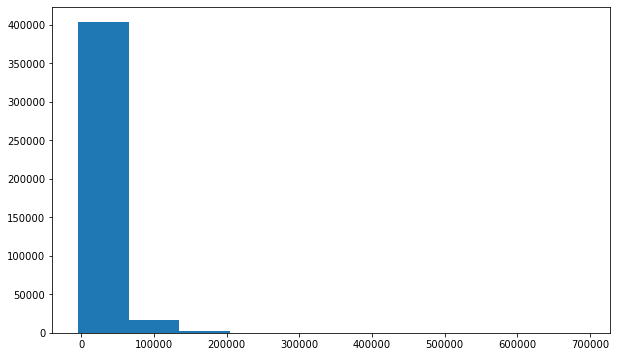

In [44]:
plt.figure(figsize=(10,6))
plt.hist(train['Weekly_Sales'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

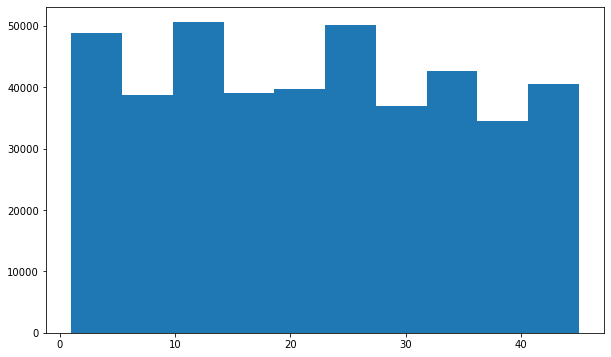

In [45]:
plt.figure(figsize=(10,6))
plt.hist(train['Store'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

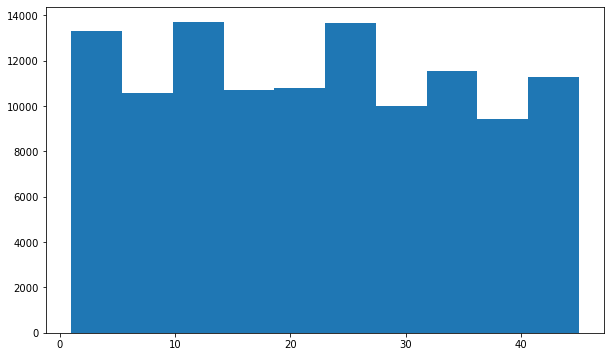

In [46]:
plt.figure(figsize=(10,6))
plt.hist(test['Store'])
plt.show

In [47]:
train.corr().style.background_gradient(cmap="coolwarm")

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.071492,-0.017179,-0.017360,-0.006447,-0.015800,-0.211088,0.208552,-0.182881,0.226410
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.001359,0.000142,0.000913,0.002378,0.000395,-0.007477,0.007837,-0.002966,0.003708
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.052356,0.012994,0.035373,0.027356,0.055712,-0.020921,-0.025864,0.243828,-0.182242
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.021931,0.198192,0.262991,0.000007,-0.032199,-0.001944,0.010460,0.000593,-0.000798
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.023452,-0.162464,-0.051196,-0.035113,-0.010817,0.182112,0.096730,-0.058313,0.042981
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.033128,-0.071678,-0.048856,-0.010492,-0.015979,-0.164210,-0.033853,0.003361,0.029687
MarkDown1,-0.071492,-0.001359,0.052356,-0.021931,-0.023452,0.033128,1.000000,0.022222,-0.107828,0.786658,0.161146,-0.032790,0.023242,0.206330,-0.153408
MarkDown2,-0.017179,0.000142,0.012994,0.198192,-0.162464,-0.071678,0.022222,1.000000,-0.048317,-0.006708,-0.007515,-0.020997,0.010714,0.051437,-0.029773
MarkDown3,-0.017360,0.000913,0.035373,0.262991,-0.051196,-0.048856,-0.107828,-0.048317,1.000000,-0.070576,-0.027629,-0.015543,0.012332,0.025537,-0.020177
MarkDown4,-0.006447,0.002378,0.027356,0.000007,-0.035113,-0.010492,0.786658,-0.006708,-0.070576,1.000000,0.106745,-0.027887,0.010433,0.086367,-0.052299


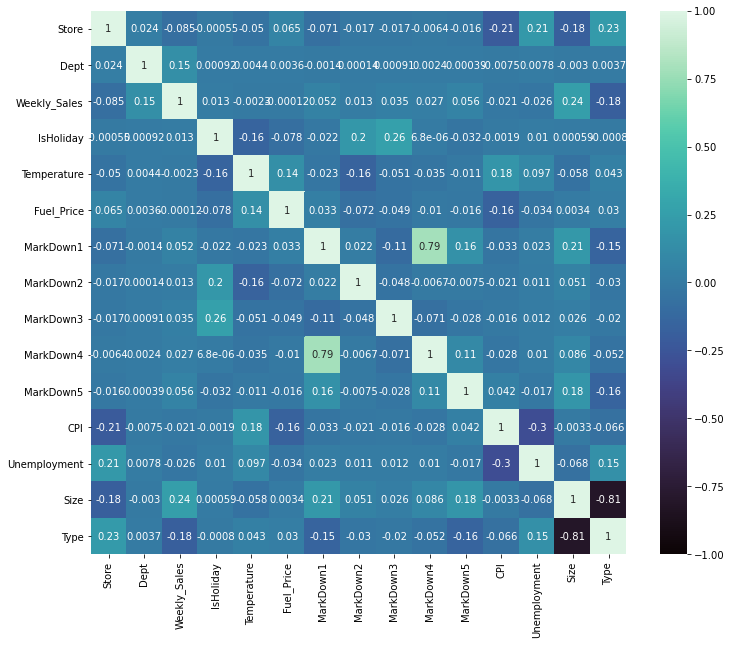

In [48]:
corr = train.corr() 

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

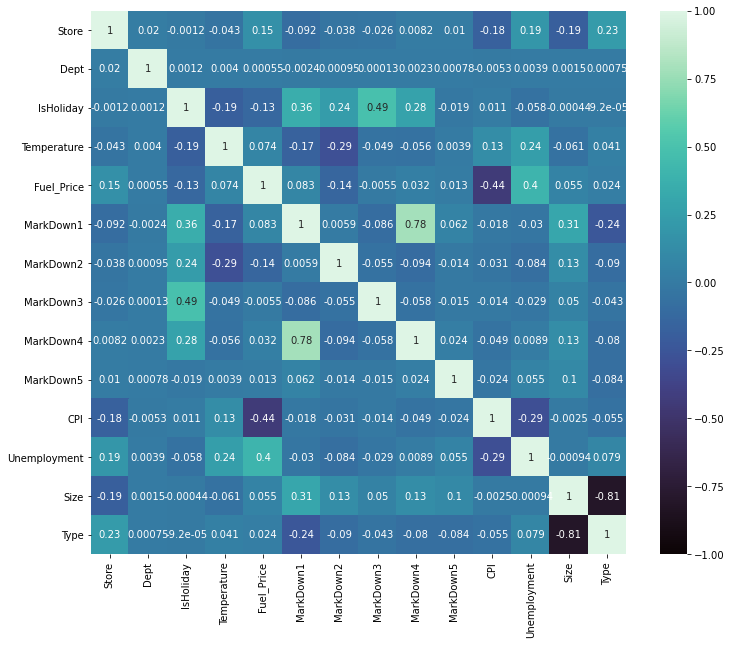

In [49]:
corr = test.corr() 

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()